In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\tyagir01\Desktop\Train_SU63ISt.csv')
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [3]:
df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M') 
df.index = df.Timestamp 
df = df.resample('D').mean()

In [4]:
from fbprophet import Prophet

In [5]:
df = df.reset_index()[['Datetime','Count','ID']].rename({'Datetime':'ds','Count':'y','ID':'ID'}, axis='columns')

In [6]:
df.head()

,ds,y,ID
0,2012-08-25,3.166667,11.5
1,2012-08-26,3.666667,35.5
2,2012-08-27,2.583333,59.5
3,2012-08-28,2.416667,83.5
4,2012-08-29,2.500000,107.5


In [7]:
model = Prophet(daily_seasonality=True)
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [28]:
#model.params

In [8]:
future = model.make_future_dataframe(periods=212)
future.tail()

,ds
969,2015-04-21
970,2015-04-22
971,2015-04-23
972,2015-04-24
973,2015-04-25


In [9]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
969,2015-04-21,691.521883,635.851917,744.147572
970,2015-04-22,689.222481,637.990560,743.504477
971,2015-04-23,680.658808,628.422711,733.507944
972,2015-04-24,671.579262,622.585552,727.285083
973,2015-04-25,622.877243,571.295498,676.052892


<Figure size 1440x720 with 0 Axes>

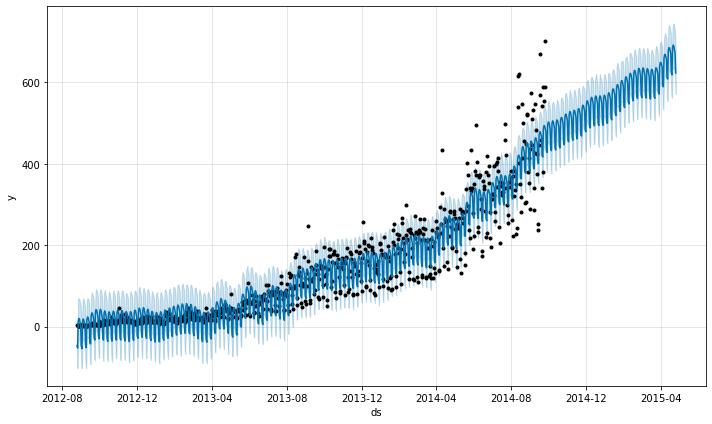

In [10]:
plt.figure(figsize=(20,10))
fig = model.plot(forecast)

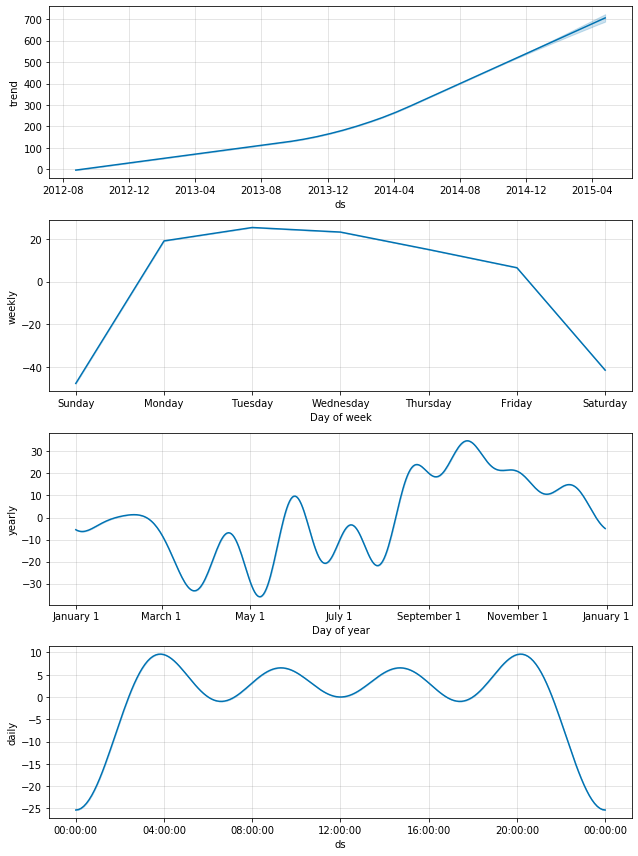

In [11]:
comp = model.plot_components(forecast)

In [12]:
base_forecast = forecast[:762]

In [13]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(df.y, base_forecast.yhat))
rmse

38.633724790309984

In [15]:
## Cross Validation
from fbprophet.diagnostics import cross_validation , performance_metrics
cv_results = cross_validation(model=model, initial = '608 days', horizon = '153 days')
df_p = performance_metrics(cv_results)
df_p

INFO:fbprophet:Making 1 forecasts with cutoffs between 2014-04-25 00:00:00 and 2014-04-25 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,15 days,834.464171,28.887094,23.446065,0.102919,0.088723,0.733333
1,16 days,1113.857188,33.374499,27.429250,0.134104,0.103995,0.666667
2,17 days,1220.459064,34.935069,29.831759,0.142085,0.110616,0.600000
3,18 days,1248.005689,35.327124,30.335749,0.143614,0.111667,0.600000
4,19 days,1196.166785,34.585644,29.397512,0.140430,0.110616,0.666667
...,...,...,...,...,...,...,...
134,149 days,17573.334180,132.564453,106.576622,0.228704,0.210235,0.200000
135,150 days,20873.992944,144.478348,119.812702,0.248175,0.258494,0.133333
136,151 days,22931.122607,151.430257,127.871428,0.260278,0.259130,0.133333
137,152 days,28317.157725,168.277027,138.145439,0.269877,0.259130,0.133333


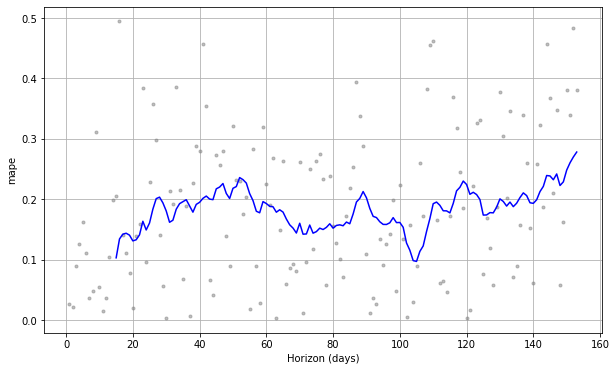

In [16]:
from fbprophet.plot import plot_cross_validation_metric
fig2 = plot_cross_validation_metric(cv_results, metric='mape')

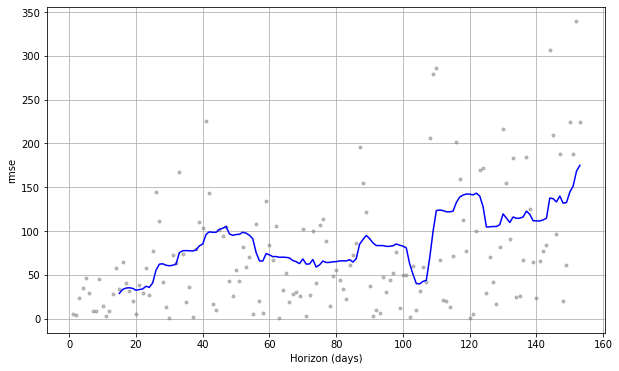

In [17]:
fig3 = plot_cross_validation_metric(cv_results, metric='rmse')

In [18]:
final_predictions = forecast[['ds','yhat']][762:]
final_predictions.index = final_predictions.ds
final_predictions.index.name = 'Datetime'
final_predictions = final_predictions.rename(columns= {'yhat': 'Count'})
final_predictions.drop(columns='ds', inplace=True)
final_predictions

,Count
Datetime,
2014-09-26,479.651246
2014-09-27,432.982474
2014-09-28,427.910325
2014-09-29,495.633826
2014-09-30,502.741905
...,...
2015-04-21,691.521883
2015-04-22,689.222481
2015-04-23,680.658808


In [19]:
final_predictions = final_predictions.round(0).astype(int)
final_predictions

,Count
Datetime,
2014-09-26,480
2014-09-27,433
2014-09-28,428
2014-09-29,496
2014-09-30,503
...,...
2015-04-21,692
2015-04-22,689
2015-04-23,681


In [20]:
final_predictions.to_csv('Time_Series_JetRail_Predictions.csv')